# Sentiment Analysis of Employee Text Messages

In [1]:

import pandas as pd

#importing the provided dataset from downloads
df = pd.read_csv(r"C:\Users\USER\Downloads\test(in).csv",header=0)


### Data Cleaning

I am doing some preliminary data cleaning before proceeding with the data. The dataset contains no missing values or duplicate values. All the data in repective header column is object type. The date column type was changed to datetime64 format. Since there were no missing values and no error is raised, all date strings are valid and convertable.

In [2]:
missing_values = df.isnull().sum()
print(missing_values)
print()

duplicates = df.duplicated().sum()
print("No. of duplicate data =", duplicates)
print()

# to check data type of each coloumn
#print(df.dtypes)           
df['date'] = pd.to_datetime(df['date'])
print(df['date'].dtype)

Subject    0
body       0
date       0
from       0
dtype: int64

No. of duplicate data = 0

datetime64[ns]


### Sentiment Labelling

In this case there is no need for data processing. We will be using Textblob which is an easy tool for sentiment analysis. There is no need to tokenize the data. Textblob automatically handles that. There is also need to remove stop words because textblob works best on full sentences. Removing them can hurt accuracy of model because we might remove context. Sentiment analysis can also be done using other models like BERT. Textblob is used because of ease of use and low computational demand. If you want more accurate results BERT must be used. It outperforms textblob textblob due to its better ability to learn complex patterns form large amounts of data.

In [3]:
from textblob import TextBlob

def sentiment_analysis(text):
    analysis = TextBlob(str(text))
    score = analysis.sentiment.polarity
    if score>0:
        return "Positive"
    elif score<0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment labelling'] = df['body'].apply(sentiment_analysis)
display(df)

,Subject,body,date,from,sentiment labelling
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com,Positive
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com,Negative
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com,Neutral
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com,Negative
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com,Negative
...,...,...,...,...,...
2186,Re: Resume,Thanks for the resume. She has had some good ...,2011-06-17,johnny.palmer@enron.com,Positive
2187,"Final Schedule - Wednesday, May 2, 2001 - Jesu...",Attached please find the following documents:\...,2011-01-20,johnny.palmer@enron.com,Positive
2188,(No Subject),Good to finally hear from. Judging from your ...,2011-01-02,don.baughman@enron.com,Positive
2189,League is Set,It looks like we have our 12 teams. We will p...,2011-03-11,rhonda.denton@enron.com,Positive


### Exploratory Data Analysis (EDA) -

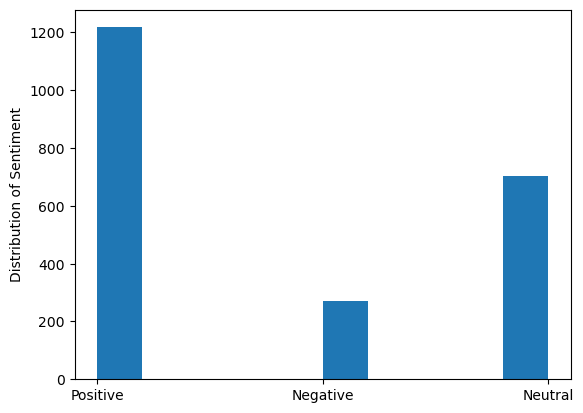

No. of texts send in 2010: 1094
No. of texts send in 2011: 1097
Most Contributed by lydia.delgado@enron.com
Least contributed by rhonda.denton@enron.com


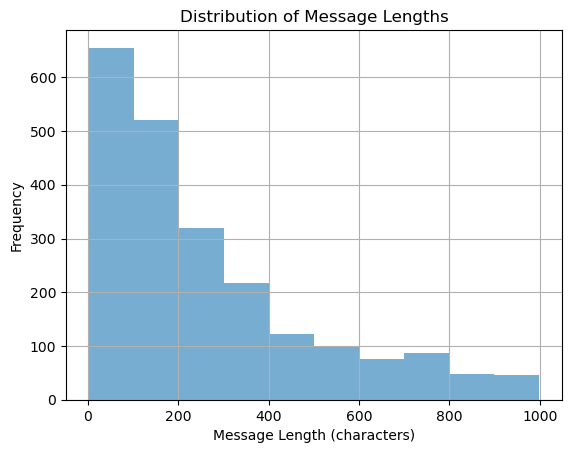

Average no. of Words per Mesage= 41
Most common words: [('the', 3400), ('to', 2726), ('you', 1870), ('and', 1703), ('i', 1527), ('for', 1424), ('a', 1171), ('in', 1129), ('of', 1108), ('on', 1009)]


In [24]:
# Create a figure for plotting
import matplotlib.pyplot as plt

# Plot a histogram of sentiment labels to visualize the distribution of sentiment
plt.figure()
plt.hist(df['sentiment labelling'])
plt.ylabel('Distribution of Sentiment')
plt.show()

# Filter data by year to analyze message volume in 2010 and 2011
year_2010 = df[df['date'].dt.year == 2010]  # Extract messages from 2010
year_2011 = df[df['date'].dt.year == 2011]  # Extract messages from 2011
print("No. of texts send in 2010:",len(year_2010))
print("No. of texts send in 2011:",len(year_2011))

# Analyze message contribution by sender
contribution = df['from'].value_counts()  # Count messages from each sender
print(f'Most Contributed by {contribution.keys()[0]}\nLeast contributed by {contribution.keys()[-1]}')


# We can also get message level insights like distribution of message length in words or characters,
# average words per message, and most commonly used words.


#distribution of message length
length= []

for msg in df['body']:
    length.append(len(msg))
plt.figure()
plt.hist(length, alpha=0.6)
plt.xlabel('Message Length (characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Message Lengths')
plt.grid(True)
plt.show()


#average words per message and commonly used words.
import nltk
from nltk.tokenize import word_tokenize
#nltk.downlaod('punkt_tab')

from collections import Counter
import re

tokens_list = [] #contains series of lists with words split from messages



text_counter = [] #contains the no. of words in each text message
all_words = [] #contains every word used in every text message including repetitions.

for msg in df['body']:
    msg = re.sub(r'[^\w\s]', '', msg.lower()) #removing punctuations from message
    tokens = word_tokenize(msg) #splitting the message into separate words
    text_counter.append(len(tokens))
    all_words.extend(tokens)
    tokens_list.append(tokens)

 #finding the average no. of words per text message sent
avg_word = sum(text_counter)/len(df['body'])
print("Average no. of Words per Mesage=", round(avg_word))

#Determining the most commonly used words
freq_word = Counter(all_words)
print("Most common words:", freq_word.most_common(10))

In [39]:
#N-gram Analysis 
from nltk.corpus import stopwords
#nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
filtered_tokens = [] #is filtered tokens_list
for i in tokens_list:
    filtered = [word for word in i if word not in stop_words]
    filtered_tokens.extend(filtered) #removing stop words like the,at,a,etc

from nltk.util import ngrams

# divinding the tokens to bigrams
bigram_list = list(ngrams(filtered_tokens, 2))

# Counting how many times a bigram appears
bigram_counts = Counter(bigram_list)

# Print top 10 bigrams
print("Most common bigrams:")
for phrase, freq in bigram_counts.most_common(10):
    print(phrase[0],phrase[1], ':', freq)

Most common bigrams:
let know : 216
would like : 76
image image : 69
power markets : 65
tradersnews energy : 65
please let : 62
markets analyst : 59
purchase sale : 59
north america : 56
bobette riner : 55


                message length     score  word count
message length        1.000000  0.268164    0.973629
score                 0.268164  1.000000    0.272360
word count            0.973629  0.272360    1.000000


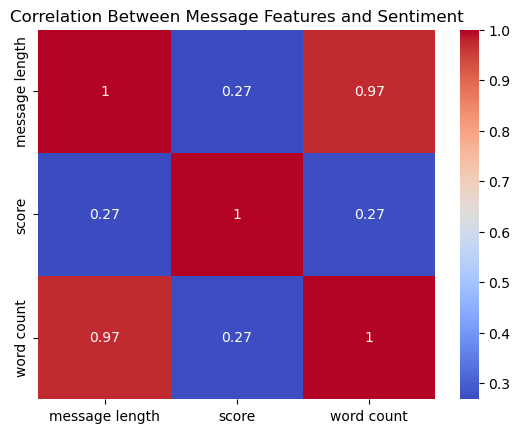

In [21]:
#df['score'] used here is first made in the following code cell and so should be run first before this
import seaborn as sns

#showing relationships and correlationship 
#checking if Wordier messages = more positive or negative?
#also if Longer or shorter messages may be more emotional

df['message length'] = length #adding length of messages to dataframe
df['word count'] = text_counter #adding no.of words in each message to dataframe

corr_matrix = df[['message length','score','word count']].corr() #describing the correlation matrix
print(corr_matrix)
plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Message Features and Sentiment")
plt.show()



##### Observation:
As seen from the graphs, the no. of positive sentiments seen across messages is way higher than neutral or negative, with fewer negative than neutral ones. The volume of text messages sent each year is almost the same. The overall sentiment distribution doesn't change over the year. Majority of texts contain about 0 to 200 texts which is supported by the average number of words per message found: 41. 

N-gram shows the most commonly used phrases across text messages. This gives us an insight on what is being discussed among employees. 'Power markets', 'market analyst', 'North America', and 'purchase sale' might suggest about asking for some market analyst to give sales analysis of this company in the the biggest markest in North america. 

The correlation map shows poor relation of sentiment with how a long or wordy a message is. 


### Employee Score Calculation

In [9]:
#Assigning a score to each message. +1 if sentiment is positive, -1 for negative, or else 0 for neutral.
def score(sentiment):
    """
    Convert sentiment labels to numeric scores.
    
    Parameters:
        sentiment label ('Positive', 'Negative', or other)
    
    Returns:
        score value (1 for Positive, -1 for Negative, 0 for others)
    """
    if sentiment == "Positive":
        return int(1)
    elif sentiment == "Negative":
        return int(-1)
    else:
        return int(0)

# Apply the scoring function to create a new column with numeric sentiment values
df['score'] = df['sentiment labelling'].apply(score)

# Extract month and year from the date column to enable time-based analysis
df['month'] = df['date'].dt.month  # Extract month (1-12)
df['year'] = df['date'].dt.year    # Extract year

# Calculate the sum of sentiment scores for each employee by month and year
# This aggregates all messages from an employee within the same month

monthly_score = df.groupby(['from', 'year', 'month'])['score'].sum().reset_index()
display(monthly_score)  # Display the monthly sentiment scores for each employee

,from,year,month,score
0,bobette.riner@ipgdirect.com,2010,1,2
1,bobette.riner@ipgdirect.com,2010,2,8
2,bobette.riner@ipgdirect.com,2010,3,4
3,bobette.riner@ipgdirect.com,2010,4,4
4,bobette.riner@ipgdirect.com,2010,5,2
...,...,...,...,...
235,sally.beck@enron.com,2011,8,7
236,sally.beck@enron.com,2011,9,1
237,sally.beck@enron.com,2011,10,4
238,sally.beck@enron.com,2011,11,5


### Employee Ranking

In [60]:
#Now to get the 3 employees withe best and worst scores

#sorting year and month in chronological order. Then score from highest to lowest. It is already sorted in alphabetically
monthly_sorted = monthly_score.sort_values(['year','month', 'score'], ascending=[True, True, False])

#for a given year the function outputs the top three employees each month
def top_rank(year):
    rank = []
    for i in range(1,13):  # Loop through all 12 months
        monthly_rank = monthly_sorted[(monthly_sorted['year']==year) & (monthly_sorted['month']==i)].iloc[0:3]
        rank.append(monthly_rank)  # Add the top 3 employees to our results list

    return pd.concat(rank)  # Combine all monthly results into a single DataFrame
    
#outputs three employees with the lowest score each month in a given year.       
def bottom_rank(year):
    rank = [] 
    for i in range(1,13):
        monthly_rank = monthly_sorted[(monthly_sorted['year']==year) & (monthly_sorted['month']==i)].iloc[-3:]
        rank.append(monthly_rank)  # Add the bottom 3 employees to our results list

    return pd.concat(rank)

display(bottom_rank(2010))  # Display the bottom 3 performers for each month in 2010

,from,year,month,score
96,johnny.palmer@enron.com,2010,1,2
216,sally.beck@enron.com,2010,1,2
192,rhonda.denton@enron.com,2010,1,0
145,lydia.delgado@enron.com,2010,2,1
169,patti.thompson@enron.com,2010,2,1
217,sally.beck@enron.com,2010,2,0
170,patti.thompson@enron.com,2010,3,1
50,eric.bass@enron.com,2010,3,0
194,rhonda.denton@enron.com,2010,3,0
219,sally.beck@enron.com,2010,4,3


##### Observation:
In the year 2010, as per the table above, the bottom performers in January are jhonny, sally, and rhonda, in february lydia, patty, and sally, and so on.

### Flight Risk Identification

In [61]:
# Using a sub dataset. taking dataset where the sentiment is only negative
df1 = df[df['sentiment labelling'] == 'Negative']

# Extract unique employee names from the 'from' column
employees = df1['from'].unique()

# Define a function to identify employees at risk based on negative sentiment patterns
def risk(year):
    at_risk = []
    
    # Filter data for the specified year
    df2 = df1[df1['year'] == year]
    
    # Loop through each month (1-12)
    for i in range(1,13):
        # Check each employee
        for employee in employees:
            # Get statistics for this employee in this specific month
            stats = df2[(df2['from'] == employee) & (df2['month'] == i)]
            
            # If employee has 4 or more negative sentiment entries in a month,
            # consider them at risk
            if len(stats['score']) >= 4:
                at_risk.append(employee)
    
    # Return the list of at-risk employees
    return at_risk

# Print the list of employees at risk for the year 2010
print("At risk employees include :\n", risk(2010))

At risk employees include :
 ['johnny.palmer@enron.com', 'don.baughman@enron.com', 'john.arnold@enron.com', 'sally.beck@enron.com', 'rhonda.denton@enron.com', 'eric.bass@enron.com', 'bobette.riner@ipgdirect.com', 'rhonda.denton@enron.com']


### Predictive Modeling

A simple linear regression model is used to analyze sentiment trends and predict future sentiment scores.

In [62]:
#important features include frequency of text messages each month, total sentiment score each month.
features = df[['body', 'month', 'year', 'score']]

freq = []           # Will store message frequency per month
tot_score = []      # Will store total sentiment score per month
months = []         # Will store month numbers
years = []

for year in [2010,2011]:
    for month in range(1,13):
        # Filter data for specific year and month
        feature_df = features[(features['year'] == year) & (features['month'] == month)]
        # Count number of messages in this month and append to frequency list
        freq.append(len(feature_df['body']))
        # Sum sentiment scores for this month and append to total score list
        tot_score.append(feature_df['score'].sum())
        # Keep track of month number
        months.append(month)
        years.append(year)

#prepering data to be used in model
model_df = pd.DataFrame({
    'year': years,
    'month': months,
    'message_freq': freq,
    'total_sentiment': tot_score
})

# Define features (X) and target variable (y) for the model
x = model_df[['year','month','message_freq']]  # Using month and message frequency as features
y = model_df['total_sentiment']          # Predicting total sentiment score


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Splitting data into testing and training data sets
# test_size=0.2 means 20% of data will be used for testing
# random_state=42 ensures reproducibility of the split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 42)
# Creating a Linear Regression model instance
model = LinearRegression()
# Training the model on the training data
model.fit(x_train,y_train)

# Making predictions on the test data
y_pred = model.predict(x_test)

# Importing metrics to evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score
# Calculating Root Mean Squared Error (RMSE)
# Lower RMSE values indicate better fit
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error=",rmse)

# Calculating R-squared score (coefficient of determination)
# R-squared ranges from 0 to 1, with 1 indicating perfect prediction
r2 = r2_score(y_test, y_pred)
print("r2 score =",r2)

Root Mean Squared Error= 5.5850439297324
r2 score = 0.37813565197287213


##### Observation:
The r2 score, meaning the goodness of fit, comes out to be 0.38 which is as good which means the regresssion model poor explains the variability in the dependant variable. It shows almost no correlation. To improve the performance, instead of linear regression model, we can use a polynomial regression model to find more complicated relation in the data. The problem may also have risen from not identifying important features in the data.

The root mean square error tells you the average magnitude of the differences between predicted values and actual values in a dataset. Since the total sentiment score per month averages around 45, a rmse of 5.59 is not that bad.

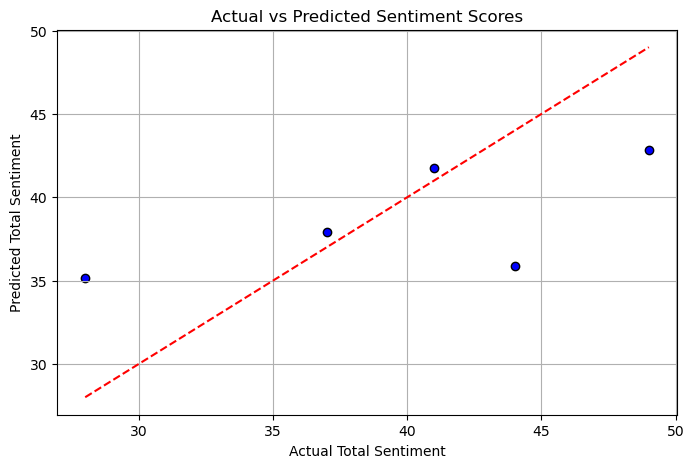

In [64]:
# Scatter plot of Actual vs Predicted sentiment scores
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred,color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel('Actual Total Sentiment')
plt.ylabel('Predicted Total Sentiment')
plt.title('Actual vs Predicted Sentiment Scores')
plt.grid(True)
plt.show()